In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import pandas as po
import numpy as np
import pickle
import os

In [2]:
import pickle
from math import isinf 
import multiprocessing
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy import array, zeros, full, argmin, inf, ndim

In [3]:
files = os.listdir('../data/2017')

In [47]:
df_2017 = po.DataFrame() 
for f in tqdm(files, total=len(files)):
    df_t = po.read_csv('../data/2017/'+f)
    df_n = po.DataFrame() 
    df_n['TS']  = df_t['TS'].apply(lambda x: datetime.utcfromtimestamp(x))
    df_n['W']  = df_t['W']
    df_2017 = po.concat([df_2017, df_n], axis=0, ignore_index=True)

100%|██████████| 12/12 [00:02<00:00,  5.58it/s]


In [49]:
start   = datetime(2017, 1, 1, 0, 0) #min(df_2017['TS'])
end     = datetime(2018, 1, 1, 0, 0) #max(df_2017['TS'])

In [51]:
intervals = po.date_range(start, end, freq='15min')
intervals

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:15:00',
               '2017-01-01 00:30:00', '2017-01-01 00:45:00',
               '2017-01-01 01:00:00', '2017-01-01 01:15:00',
               '2017-01-01 01:30:00', '2017-01-01 01:45:00',
               '2017-01-01 02:00:00', '2017-01-01 02:15:00',
               ...
               '2017-12-31 21:45:00', '2017-12-31 22:00:00',
               '2017-12-31 22:15:00', '2017-12-31 22:30:00',
               '2017-12-31 22:45:00', '2017-12-31 23:00:00',
               '2017-12-31 23:15:00', '2017-12-31 23:30:00',
               '2017-12-31 23:45:00', '2018-01-01 00:00:00'],
              dtype='datetime64[ns]', length=35041, freq='15T')

In [53]:
df_2017['Bucket'] = po.cut(df_2017['TS'], bins=intervals, labels=intervals.to_list()[:-1])

In [55]:
df_2017 = df_2017.sort_values('TS').reset_index(drop=True)

In [57]:
df_2017[11334:11364]

,TS,W,Bucket
11334,2017-01-10 05:00:50,114495.305,2017-01-10 05:00:00
11335,2017-01-10 05:00:50,114495.305,2017-01-10 05:00:00
11336,2017-01-10 05:03:00,116280.140,2017-01-10 05:00:00
11337,2017-01-10 05:03:00,116280.140,2017-01-10 05:00:00
11338,2017-01-10 05:03:00,112701.734,2017-01-10 05:00:00
11339,2017-01-10 05:03:00,112701.734,2017-01-10 05:00:00
11340,2017-01-10 05:05:00,118702.980,2017-01-10 05:00:00
11341,2017-01-10 05:05:00,122852.086,2017-01-10 05:00:00
11342,2017-01-10 05:05:00,122852.086,2017-01-10 05:00:00
11343,2017-01-10 05:05:00,125621.890,2017-01-10 05:00:00


In [59]:
groups      = df_2017.groupby('Bucket')
buckets     = df_2017['Bucket'].unique().to_list()

In [61]:
df_2017_15 = po.DataFrame()
for b in tqdm(buckets, total=len(buckets)):
    df_t = groups.get_group(b)
    row = {'time': b,
            'consumption': df_t.mean()[0]}
    df_2017_15 = df_2017_15.append(row, ignore_index=True)

100%|██████████| 30694/30694 [02:53<00:00, 177.41it/s]


In [63]:
df_2017_15 = po.merge(right=df_2017_15, left=po.DataFrame(intervals, columns=['time']), on='time', how='outer')

In [65]:
df_2017_15.to_pickle('../data/v2/2017.pkl')

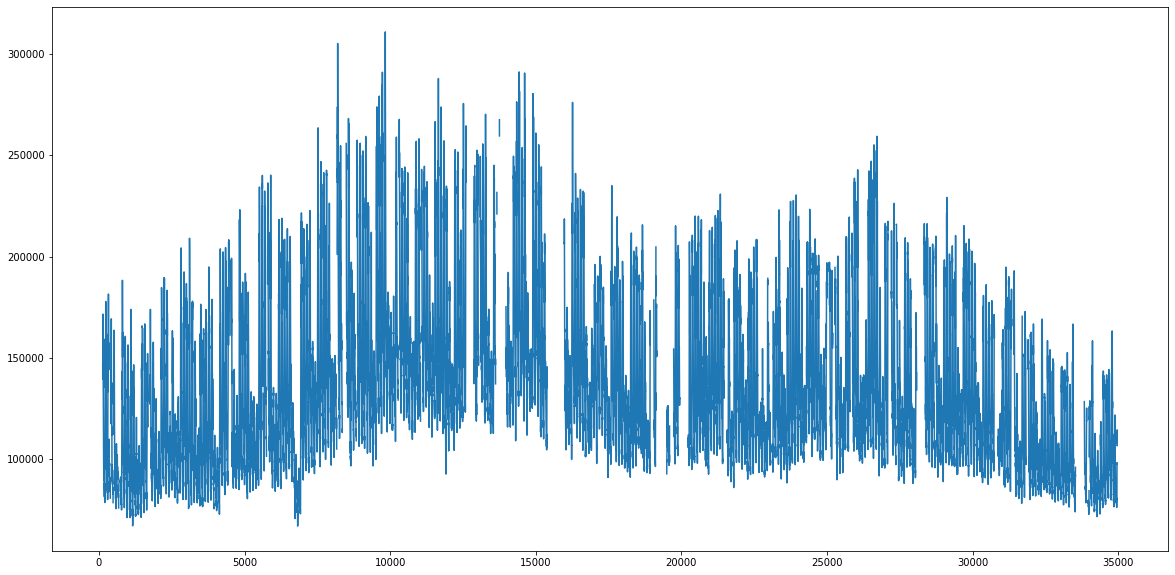

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(df_2017_15['consumption'])

In [69]:
files = os.listdir('../data/2018')

In [71]:
df_2018 = po.DataFrame() 
for f in tqdm(files, total=len(files)):
    df_t = po.read_csv('../data/2018/'+f)
    df_n = po.DataFrame() 
    df_n['TS'] = df_t['TS'].apply(lambda x: datetime.utcfromtimestamp(x))
    df_n['W']  = df_t['W']
    df_2018 = po.concat([df_2018, df_n], axis=0, ignore_index=True)

100%|██████████| 11/11 [00:01<00:00,  5.65it/s]


In [73]:
start   = datetime(2018, 1, 1, 0, 0) #min(df_2017['TS'])
end     = datetime(2019, 1, 1, 0, 0) #max(df_2017['TS'])

In [75]:
intervals = po.date_range(start, end, freq='15min')
intervals

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:15:00',
               '2018-01-01 00:30:00', '2018-01-01 00:45:00',
               '2018-01-01 01:00:00', '2018-01-01 01:15:00',
               '2018-01-01 01:30:00', '2018-01-01 01:45:00',
               '2018-01-01 02:00:00', '2018-01-01 02:15:00',
               ...
               '2018-12-31 21:45:00', '2018-12-31 22:00:00',
               '2018-12-31 22:15:00', '2018-12-31 22:30:00',
               '2018-12-31 22:45:00', '2018-12-31 23:00:00',
               '2018-12-31 23:15:00', '2018-12-31 23:30:00',
               '2018-12-31 23:45:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', length=35041, freq='15T')

In [77]:
df_2018['Bucket'] = po.cut(df_2018['TS'], bins=intervals, labels=intervals.to_list()[:-1])

In [ ]:
df_2018 = df_2018.sort_values('TS').reset_index(drop=True)

In [21]:
df_2018[11334:11364]

,TS,W,Bucket
11334,2018-01-10 13:49:50,111403.770,2018-01-10 13:45:00
11335,2018-01-10 13:49:50,114952.055,2018-01-10 13:45:00
11336,2018-01-10 13:52:00,123041.110,2018-01-10 13:45:00
11337,2018-01-10 13:52:00,120410.500,2018-01-10 13:45:00
11338,2018-01-10 13:52:00,117203.170,2018-01-10 13:45:00
11339,2018-01-10 13:54:10,115686.400,2018-01-10 13:45:00
11340,2018-01-10 13:54:10,116268.940,2018-01-10 13:45:00
11341,2018-01-10 13:56:20,119681.870,2018-01-10 13:45:00
11342,2018-01-10 13:56:20,121081.740,2018-01-10 13:45:00
11343,2018-01-10 13:58:20,123601.664,2018-01-10 13:45:00


In [22]:
groups      = df_2018.groupby('Bucket')
buckets     = df_2018['Bucket'].unique().to_list()

In [23]:
df_2018_15 = po.DataFrame()
for b in tqdm(buckets, total=len(buckets)):
    df_t = groups.get_group(b)
    row = {'time': b,
            'consumption': df_t.mean()[0]}
    df_2018_15 = df_2018_15.append(row, ignore_index=True)

100%|██████████| 25776/25776 [02:23<00:00, 179.71it/s]


In [24]:
df_2018_15 = po.merge(right=df_2018_15, left=po.DataFrame(intervals, columns=['time']), on='time', how='outer')

In [25]:
df_2018_15.to_pickle('../data/v2/2018.pkl')

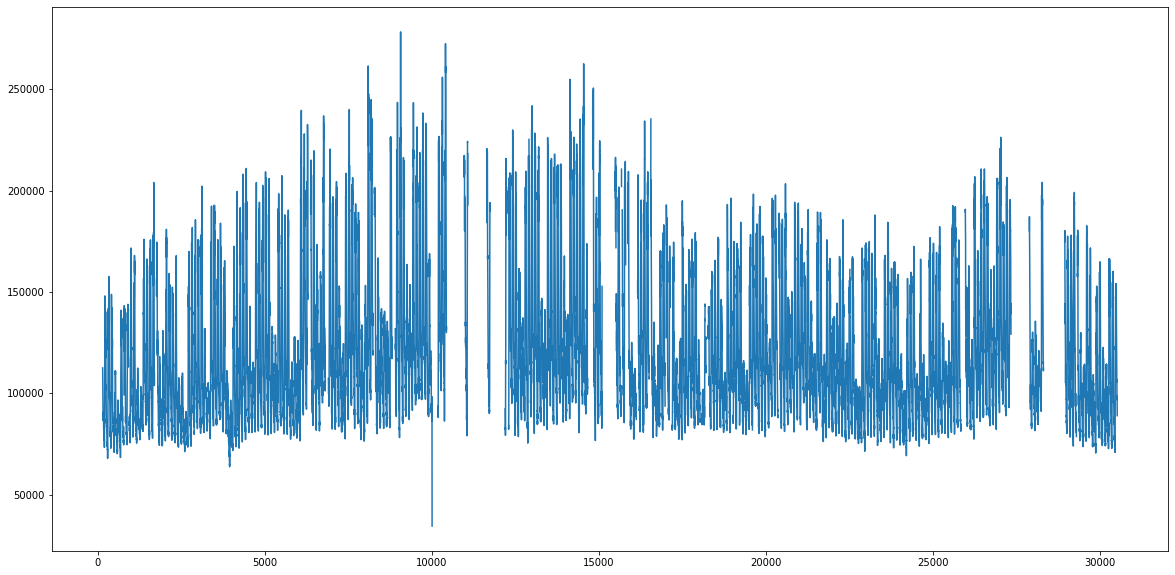

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(df_2018_15['consumption'])

In [27]:
df_2017_15 = df_2017_15.set_index('time')
df_2018_15 = df_2018_15.set_index('time')

In [28]:
df_2019 = po.read_csv('../data/2019.csv', sep=';')
df_2019

,Series,Time,Value
0,power_k_m,2018-09-25T00:00:00+05:30,1.026296e+05
1,power_k_m,2018-09-25T00:05:00+05:30,1.022128e+05
2,power_k_m,2018-09-25T00:10:00+05:30,1.015995e+05
3,power_k_m,2018-09-25T00:15:00+05:30,1.036032e+05
4,power_k_m,2018-09-25T00:20:00+05:30,1.007787e+05
...,...,...,...
489163,energy_consumed power_k_m,2019-11-04T23:40:00+05:30,7.326824e+08
489164,energy_consumed power_k_m,2019-11-04T23:45:00+05:30,7.326906e+08
489165,energy_consumed power_k_m,2019-11-04T23:50:00+05:30,7.326987e+08
489166,energy_consumed power_k_m,2019-11-04T23:55:00+05:30,7.327072e+08


In [29]:
df_2019['Series'].value_counts()

min power_k_m                     81528
count power_k_m                   81528
slot_energy_consumed power_k_m    81528
power_k_m                         81528
energy_consumed power_k_m         81528
max power_k_m                     81528
Name: Series, dtype: int64

In [30]:
df_2019 = df_2019[df_2019['Series']=='power_k_m']

In [31]:
df_2019['date'] = df_2019['Time'].apply(lambda x: x.split('T')[0])
df_2019['date'] = df_2019['Time'].apply(lambda x: x.split('T')[1])

In [32]:
df_2019['time'] = df_2019['Time'].apply(lambda x: datetime.strptime(x.split('T')[0] + ' ' + x.split('T')[1].split('+')[0], '%Y-%m-%d %H:%M:%S'))

In [33]:
df_2019.sort_values('time').iloc[0]

Series                    power_k_m
Time      2018-09-25T00:00:00+05:30
Value                        102630
date                 00:00:00+05:30
time            2018-09-25 00:00:00
Name: 0, dtype: object

In [34]:
df_2019.sort_values('time').iloc[-1]

Series                    power_k_m
Time      2019-11-05T00:00:00+05:30
Value                       93211.6
date                 00:00:00+05:30
time            2019-11-05 00:00:00
Name: 81527, dtype: object

In [35]:
start   = datetime(2018, 9, 24, 23, 45) 
end     = datetime(2019, 11, 5, 0, 0) 

In [36]:
intervals = po.date_range(start, end, freq='15min')
intervals

DatetimeIndex(['2018-09-24 23:45:00', '2018-09-25 00:00:00',
               '2018-09-25 00:15:00', '2018-09-25 00:30:00',
               '2018-09-25 00:45:00', '2018-09-25 01:00:00',
               '2018-09-25 01:15:00', '2018-09-25 01:30:00',
               '2018-09-25 01:45:00', '2018-09-25 02:00:00',
               ...
               '2019-11-04 21:45:00', '2019-11-04 22:00:00',
               '2019-11-04 22:15:00', '2019-11-04 22:30:00',
               '2019-11-04 22:45:00', '2019-11-04 23:00:00',
               '2019-11-04 23:15:00', '2019-11-04 23:30:00',
               '2019-11-04 23:45:00', '2019-11-05 00:00:00'],
              dtype='datetime64[ns]', length=38978, freq='15T')

In [37]:
df_2019['Bucket'] = po.cut(df_2019['time'], bins=intervals, labels=intervals.to_list()[:-1])
df_2019 = df_2019.sort_values('time').reset_index(drop=True)

In [38]:
df_2019

,Series,Time,Value,date,time,Bucket
0,power_k_m,2018-09-25T00:00:00+05:30,102629.562969,00:00:00+05:30,2018-09-25 00:00:00,2018-09-24 23:45:00
1,power_k_m,2018-09-25T00:05:00+05:30,102212.754505,00:05:00+05:30,2018-09-25 00:05:00,2018-09-25 00:00:00
2,power_k_m,2018-09-25T00:10:00+05:30,101599.520625,00:10:00+05:30,2018-09-25 00:10:00,2018-09-25 00:00:00
3,power_k_m,2018-09-25T00:15:00+05:30,103603.210859,00:15:00+05:30,2018-09-25 00:15:00,2018-09-25 00:00:00
4,power_k_m,2018-09-25T00:20:00+05:30,100778.661120,00:20:00+05:30,2018-09-25 00:20:00,2018-09-25 00:15:00
...,...,...,...,...,...,...
81523,power_k_m,2019-11-04T23:40:00+05:30,95930.424740,23:40:00+05:30,2019-11-04 23:40:00,2019-11-04 23:30:00
81524,power_k_m,2019-11-04T23:45:00+05:30,98252.784844,23:45:00+05:30,2019-11-04 23:45:00,2019-11-04 23:30:00
81525,power_k_m,2019-11-04T23:50:00+05:30,97192.376667,23:50:00+05:30,2019-11-04 23:50:00,2019-11-04 23:45:00
81526,power_k_m,2019-11-04T23:55:00+05:30,101693.609922,23:55:00+05:30,2019-11-04 23:55:00,2019-11-04 23:45:00


In [39]:
groups      = df_2019.groupby('Bucket')
buckets     = df_2019['Bucket'].unique().to_list()

In [40]:
df_2019_15 = po.DataFrame()
for b in tqdm(buckets, total=len(buckets)):
    df_t = groups.get_group(b)
    row = {'time': b,
            'consumption': df_t.mean()[0]}
    df_2019_15 = df_2019_15.append(row, ignore_index=True)

100%|██████████| 27212/27212 [03:05<00:00, 146.75it/s]


In [42]:
df_2019_15 = po.merge(right=df_2019_15, left=po.DataFrame(intervals, columns=['time']), on='time', how='outer')

In [44]:
df_2019_15

,time,consumption
0,2018-09-24 23:45:00,102629.562969
1,2018-09-25 00:00:00,102471.828663
2,2018-09-25 00:15:00,101221.197257
3,2018-09-25 00:30:00,101687.480833
4,2018-09-25 00:45:00,101832.306033
...,...,...
38973,2019-11-04 23:00:00,102064.379714
38974,2019-11-04 23:15:00,100378.796042
38975,2019-11-04 23:30:00,98593.460339
38976,2019-11-04 23:45:00,97365.874939


In [46]:
#df_2019_15 = df_2019_15[df_2019_15['time'] >= '2019-01-01'].reset_index(drop=True)

In [48]:
df_2019_15.to_pickle('../data/v2/2019.pkl')

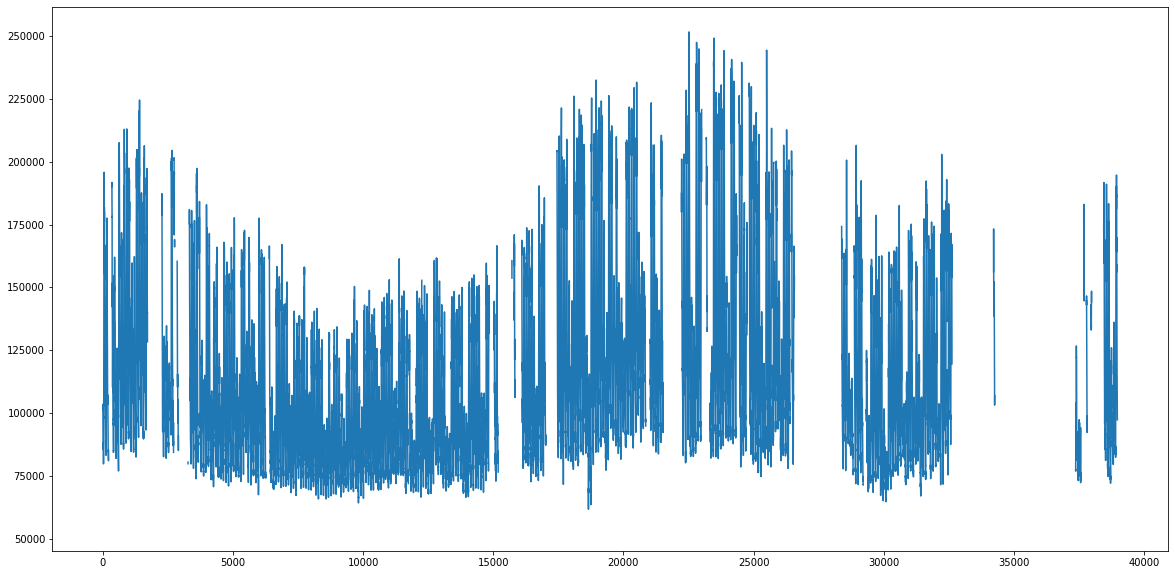

In [50]:
plt.figure(figsize=(20, 10))
plt.plot(df_2019_15['consumption'])

In [52]:
df_2019_15 = df_2019_15.set_index('time')

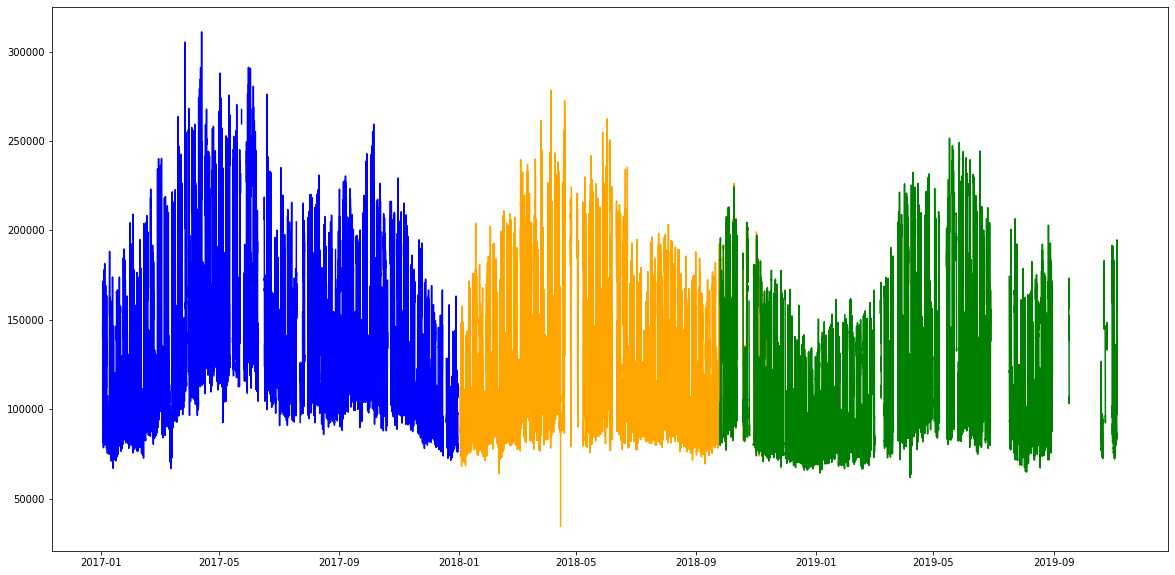

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(df_2017_15['consumption'], color='blue')
plt.plot(df_2018_15['consumption'], color='orange')
plt.plot(df_2019_15['consumption'], color='green')

In [56]:
df = po.concat([df_2017_15, df_2018_15, df_2019_15], axis=0)
df

,consumption
time,
2017-01-01 00:00:00,NaN
2017-01-01 00:15:00,NaN
2017-01-01 00:30:00,NaN
2017-01-01 00:45:00,NaN
2017-01-01 01:00:00,NaN
...,...
2019-11-04 23:00:00,102064.379714
2019-11-04 23:15:00,100378.796042
2019-11-04 23:30:00,98593.460339


In [58]:
df.to_pickle('../data/v2/full.pkl')

In [3]:
df = po.read_pickle('../data/v2/full.pkl')

In [4]:
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while (i > 0) or (j > 0):
        tb = argmin((D[i, j], D[i, j + 1], D[i + 1, j]))
        if tb == 0:
            i -= 1
            j -= 1
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

In [5]:
def dtw(x, y, dist, warp=1, w=inf, s=1.0):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.
    :param array x: N1*M array
    :param array y: N2*M arrayNot only do you need normalisation, but you should apply the exact same scaling as for your training data. That means storing the scale and offset used with your training data, and using that again. A common beginner mistake is to separately normalise your train and test data.
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    :param int w: window size limiting the maximal distance between indices of matched entries |i,j|.
    :param float s: weight applied on off-diagonal moves of the path. As s gets larger, the warping path is increasingly biased towards the diagonal
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    assert isinf(w) or (w >= abs(len(x) - len(y)))
    assert s > 0
    r, c = len(x), len(y)
    if not isinf(w):
        D0 = full((r + 1, c + 1), inf)
        for i in range(1, r + 1):
            D0[i, max(1, i - w):min(c + 1, i + w + 1)] = 0
        D0[0, 0] = 0
    else:
        D0 = zeros((r + 1, c + 1))
        D0[0, 1:] = inf
        D0[1:, 0] = inf
    D1 = D0[1:, 1:]  # view
    for i in range(r):
        for j in range(c):
            if (isinf(w) or (max(0, i - w) <= j <= min(c, i + w))):
                D1[i, j] = dist(i, j, x, y)
    C = D1.copy()
    jrange = range(c)
    for i in range(r):
        if not isinf(w):
            jrange = range(max(0, i - w), min(c, i + w + 1))
        for j in jrange:
            min_list = [D0[i, j]]
            for k in range(1, warp + 1):
                i_k = min(i + k, r)
                j_k = min(j + k, c)
                min_list += [D0[i_k, j] * s, D0[i, j_k] * s]
            D1[i, j] += min(min_list)
    if len(x) == 1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1], C, D1, path

In [6]:
def derivative_dtw_distance(i, j, x, y):
    if i+1 == len(x) or j+1 == len(y):
        dist = (x[i] - y[j])**2
    
    else:
        d_x_i = ((x[i] - x[i-1]) + (x[i+1] - x[i-1])/2)/2
        d_y_j = ((y[j] - y[j-1]) + (y[j+1] - y[j-1])/2)/2    

        dist = (d_x_i - d_y_j)**2

    return dist

In [7]:
def dtwbi(D, Q, len_gap, stride=20):
	
	min_dtw_cost = inf
	start_index = 0
	
	for i in range(0, len(D)-len_gap, stride):
		#print(i, i+len_gap)
		try:
			cost, cost_matrix, acc_cost_matrix, path = dtw(D[i:i+len_gap], Q, dist=derivative_dtw_distance)
		except:
			print(D[i*len_gap:(i+1)*len_gap])
			print('Q', Q)
			print('len_gap', len_gap)
			print('len(D)', len(D))
			print(i*len_gap, (i+1)*len_gap)
			raise
		if cost < min_dtw_cost:
			min_dtw_cost = cost
			start_index=i

	return start_index

In [8]:
def apply_dtwbi_after(x, start_index, end_index, span=4*24*7*4): # span = 1 month
	len_gap = end_index - start_index
	
	Qa = x[end_index:end_index+len_gap]
	Da = x[end_index+len_gap:end_index+len_gap+span]
	
	Qas_start = dtwbi(Da, Qa, len_gap)
	#Qas = x[Qas_start:Qas_start+len_gap]
	
	if Qas_start-len_gap < 0:
		refA = x[Qas_start:Qas_start+len_gap] # = Qa
	else:
		refA = x[Qas_start-len_gap:Qas_start] # Previous window of Qas

	return refA

In [9]:
def apply_dtwbi_before(x, start_index, end_index, span=4*24*7*4): # span = 1 month
	len_gap = end_index - start_index
	
	Qb = x[start_index-len_gap:start_index]
	Db = x[start_index-len_gap-span:start_index-len_gap]
	
	if len(Qb) == 0:
		print('start_index', start_index)
		print('len_gap', len_gap)
		print('end_index', end_index)
		raise

	Qbs_start = dtwbi(Db, Qb, len_gap)
	#Qbs = x[Qbs_start:Qbs_start+len_gap]
	
	if Qbs_start+2*len_gap > len(x):
		refB = x[Qbs_start:Qbs_start+len_gap] # = Qb
	
	else:
		refB = x[Qbs_start+len_gap:Qbs_start+2*len_gap] # Next window of Qbs

	return refB

In [10]:
def edtwbi(x, start_index, end_index):
	len_gap = end_index - start_index
	
	if end_index + len_gap >= len(x):
		refB = apply_dtwbi_before(x, start_index, end_index) # only dtwbi in other direction
		
		return refB
		
	elif start_index-len_gap <= 0:
		refA = apply_dtwbi_after(x, start_index, end_index) # only dtwbi in other direction
		
		return refA
	
	else: # both cannot simultaneously happen, so not keeping a case for that
		refA = apply_dtwbi_after(x, start_index, end_index)
		refB = apply_dtwbi_before(x, start_index, end_index)
		
		return np.mean([np.array(refA), np.array(refB)], axis = 0)

In [11]:
def find_gaps(x):
    seq = False
    missing_seqs = []
    seq_start_idx = -1
    for i in range(len(x)):
        if seq == False and x[i] == 0:
            seq = True
            seq_start_idx = i
        
        elif seq == True and x[i] != 0:
            seq = False
            if seq_start_idx == -1:
                raise
            missing_seqs.append((seq_start_idx, i))
            seq_start_idx = -1
    
    return missing_seqs

In [12]:
row = df.fillna(value=0)['consumption'].to_list()
row_filled = row.copy()

gaps = find_gaps(row)

In [13]:
for gap in tqdm(gaps, total=len(gaps)):
    if gap[1] - gap[0] < 0.3*len(row):
        row_filled[gap[0]:gap[1]] = edtwbi(row, gap[0], gap[1])

100%|██████████| 164/164 [57:48<00:00, 21.15s/it]


In [14]:
'''
with open('edtwbi_imputed.pkl', 'wb') as f:
    pickle.dump(row_filled, f)
'''

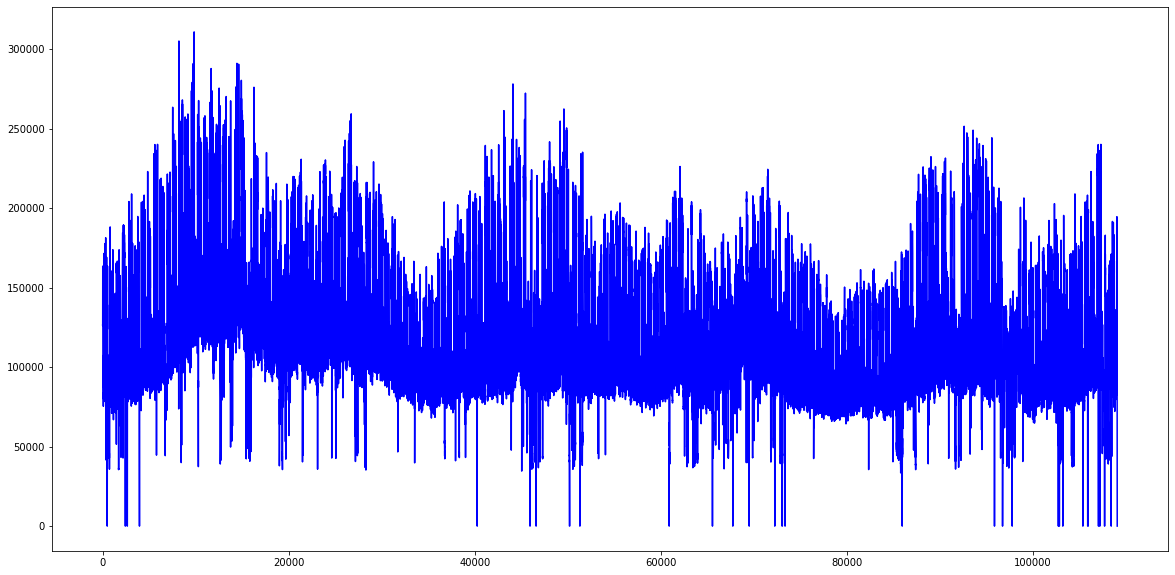

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(row_filled, color='blue')

In [4]:
with open('edtwbi_imputed.pkl', 'rb') as f:
    row_filled = pickle.load(f)

In [5]:
df['consumption'] = row_filled

In [6]:
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:15:00',
               '2017-01-01 00:30:00', '2017-01-01 00:45:00',
               '2017-01-01 01:00:00', '2017-01-01 01:15:00',
               '2017-01-01 01:30:00', '2017-01-01 01:45:00',
               '2017-01-01 02:00:00', '2017-01-01 02:15:00',
               ...
               '2019-11-04 21:45:00', '2019-11-04 22:00:00',
               '2019-11-04 22:15:00', '2019-11-04 22:30:00',
               '2019-11-04 22:45:00', '2019-11-04 23:00:00',
               '2019-11-04 23:15:00', '2019-11-04 23:30:00',
               '2019-11-04 23:45:00', '2019-11-05 00:00:00'],
              dtype='datetime64[ns]', name='time', length=109060, freq=None)

In [12]:
df.index.min()

Timestamp('2017-01-01 00:00:00')

In [13]:
df.index.max()

Timestamp('2019-11-05 00:00:00')

In [15]:
df.index.max() - df.index.min()

Timedelta('1038 days 00:00:00')

In [16]:
1038*96

99648

In [14]:
df.index.max() - df.index.min()

Timedelta('1038 days 00:00:00')

In [39]:
df = df[df.index.duplicated()==False]

In [40]:
#po.date_range(start=df.index.min(), end=df.index.max(), freq='15T')

In [43]:
df = df[:-1]

In [44]:
len(df)

99648

In [45]:
len(df)/96

1038.0

In [46]:
0.6*1038

622.8

In [47]:
0.2*1038

207.60000000000002

In [48]:
1038 - 207 - 622 

209

In [64]:
int(0.6*len(df)/96)*96

59712

In [67]:
int(0.2*len(df)/96)*96

19872

In [10]:
109060/(96)

1136.0416666666667

In [52]:
df.isnull().sum()

consumption    0
dtype: int64

In [51]:
df[df['consumption'] == 0]

,consumption
time,


In [49]:
df_train    = df.iloc[:622*96]
df_val      = df.iloc[622*96:(622+208)*96]
df_test     = df.iloc[(622+208)*96:]

In [56]:
df_val.index.max().date() - df_val.index.min().date()

datetime.timedelta(days=207)

In [53]:
#df[df['consumption'] == 0] = None
#df = df.fillna(method='ffill')

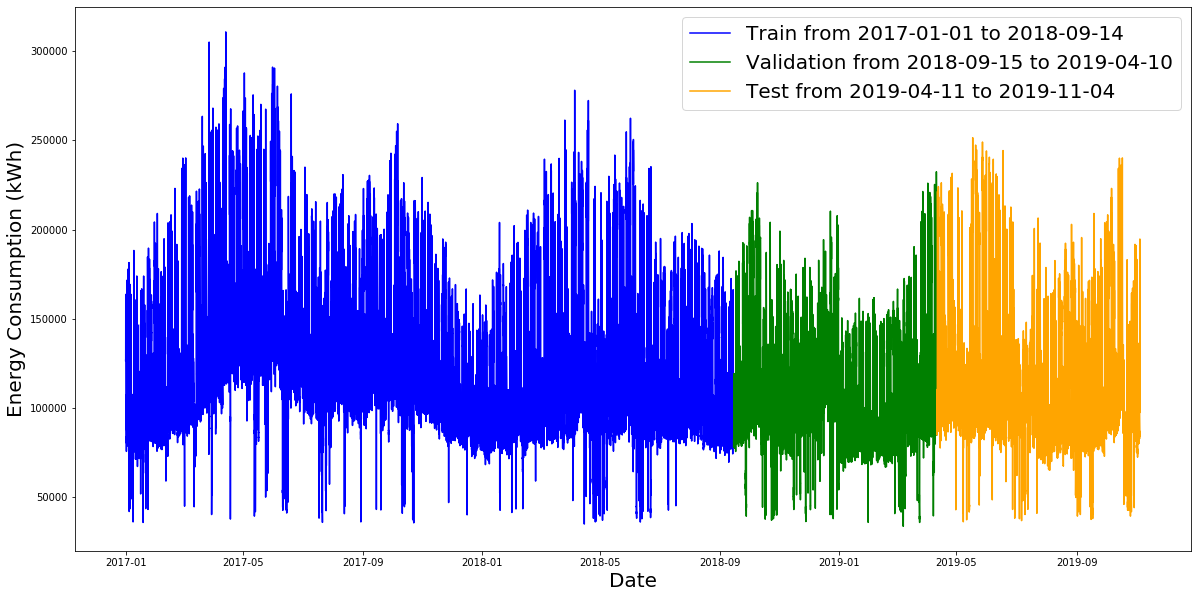

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(df_train['consumption'], color='blue')
plt.plot(df_val['consumption'], color='green')
plt.plot(df_test['consumption'], color='orange')
plt.legend(['Train from {} to {}'.format(str(df_train.index.min().date()), str(df_train.index.max().date())), 'Validation from {} to {}'.format(str(df_val.index.min().date()), str(df_val.index.max().date())), 'Test from {} to {}'.format(str(df_test.index.min().date()), str(df_test.index.max().date()))], fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('train_val_test_split.png')

In [58]:
df.to_pickle('eDTWBI_Imputed_Data.pkl')